In [49]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.stats import zscore
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [50]:
df=pd.read_csv('C:\\Users\\Nidhi\\Downloads\\winequality-red+(1).csv')

In [51]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [52]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed_acidity           1599 non-null float64
volatile_acidity        1599 non-null float64
citric_acid             1599 non-null float64
residual_sugar          1599 non-null float64
chlorides               1599 non-null float64
free_sulfur_dioxide     1599 non-null float64
total_sulfur_dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [54]:
df.drop('quality',inplace =True ,axis=1)

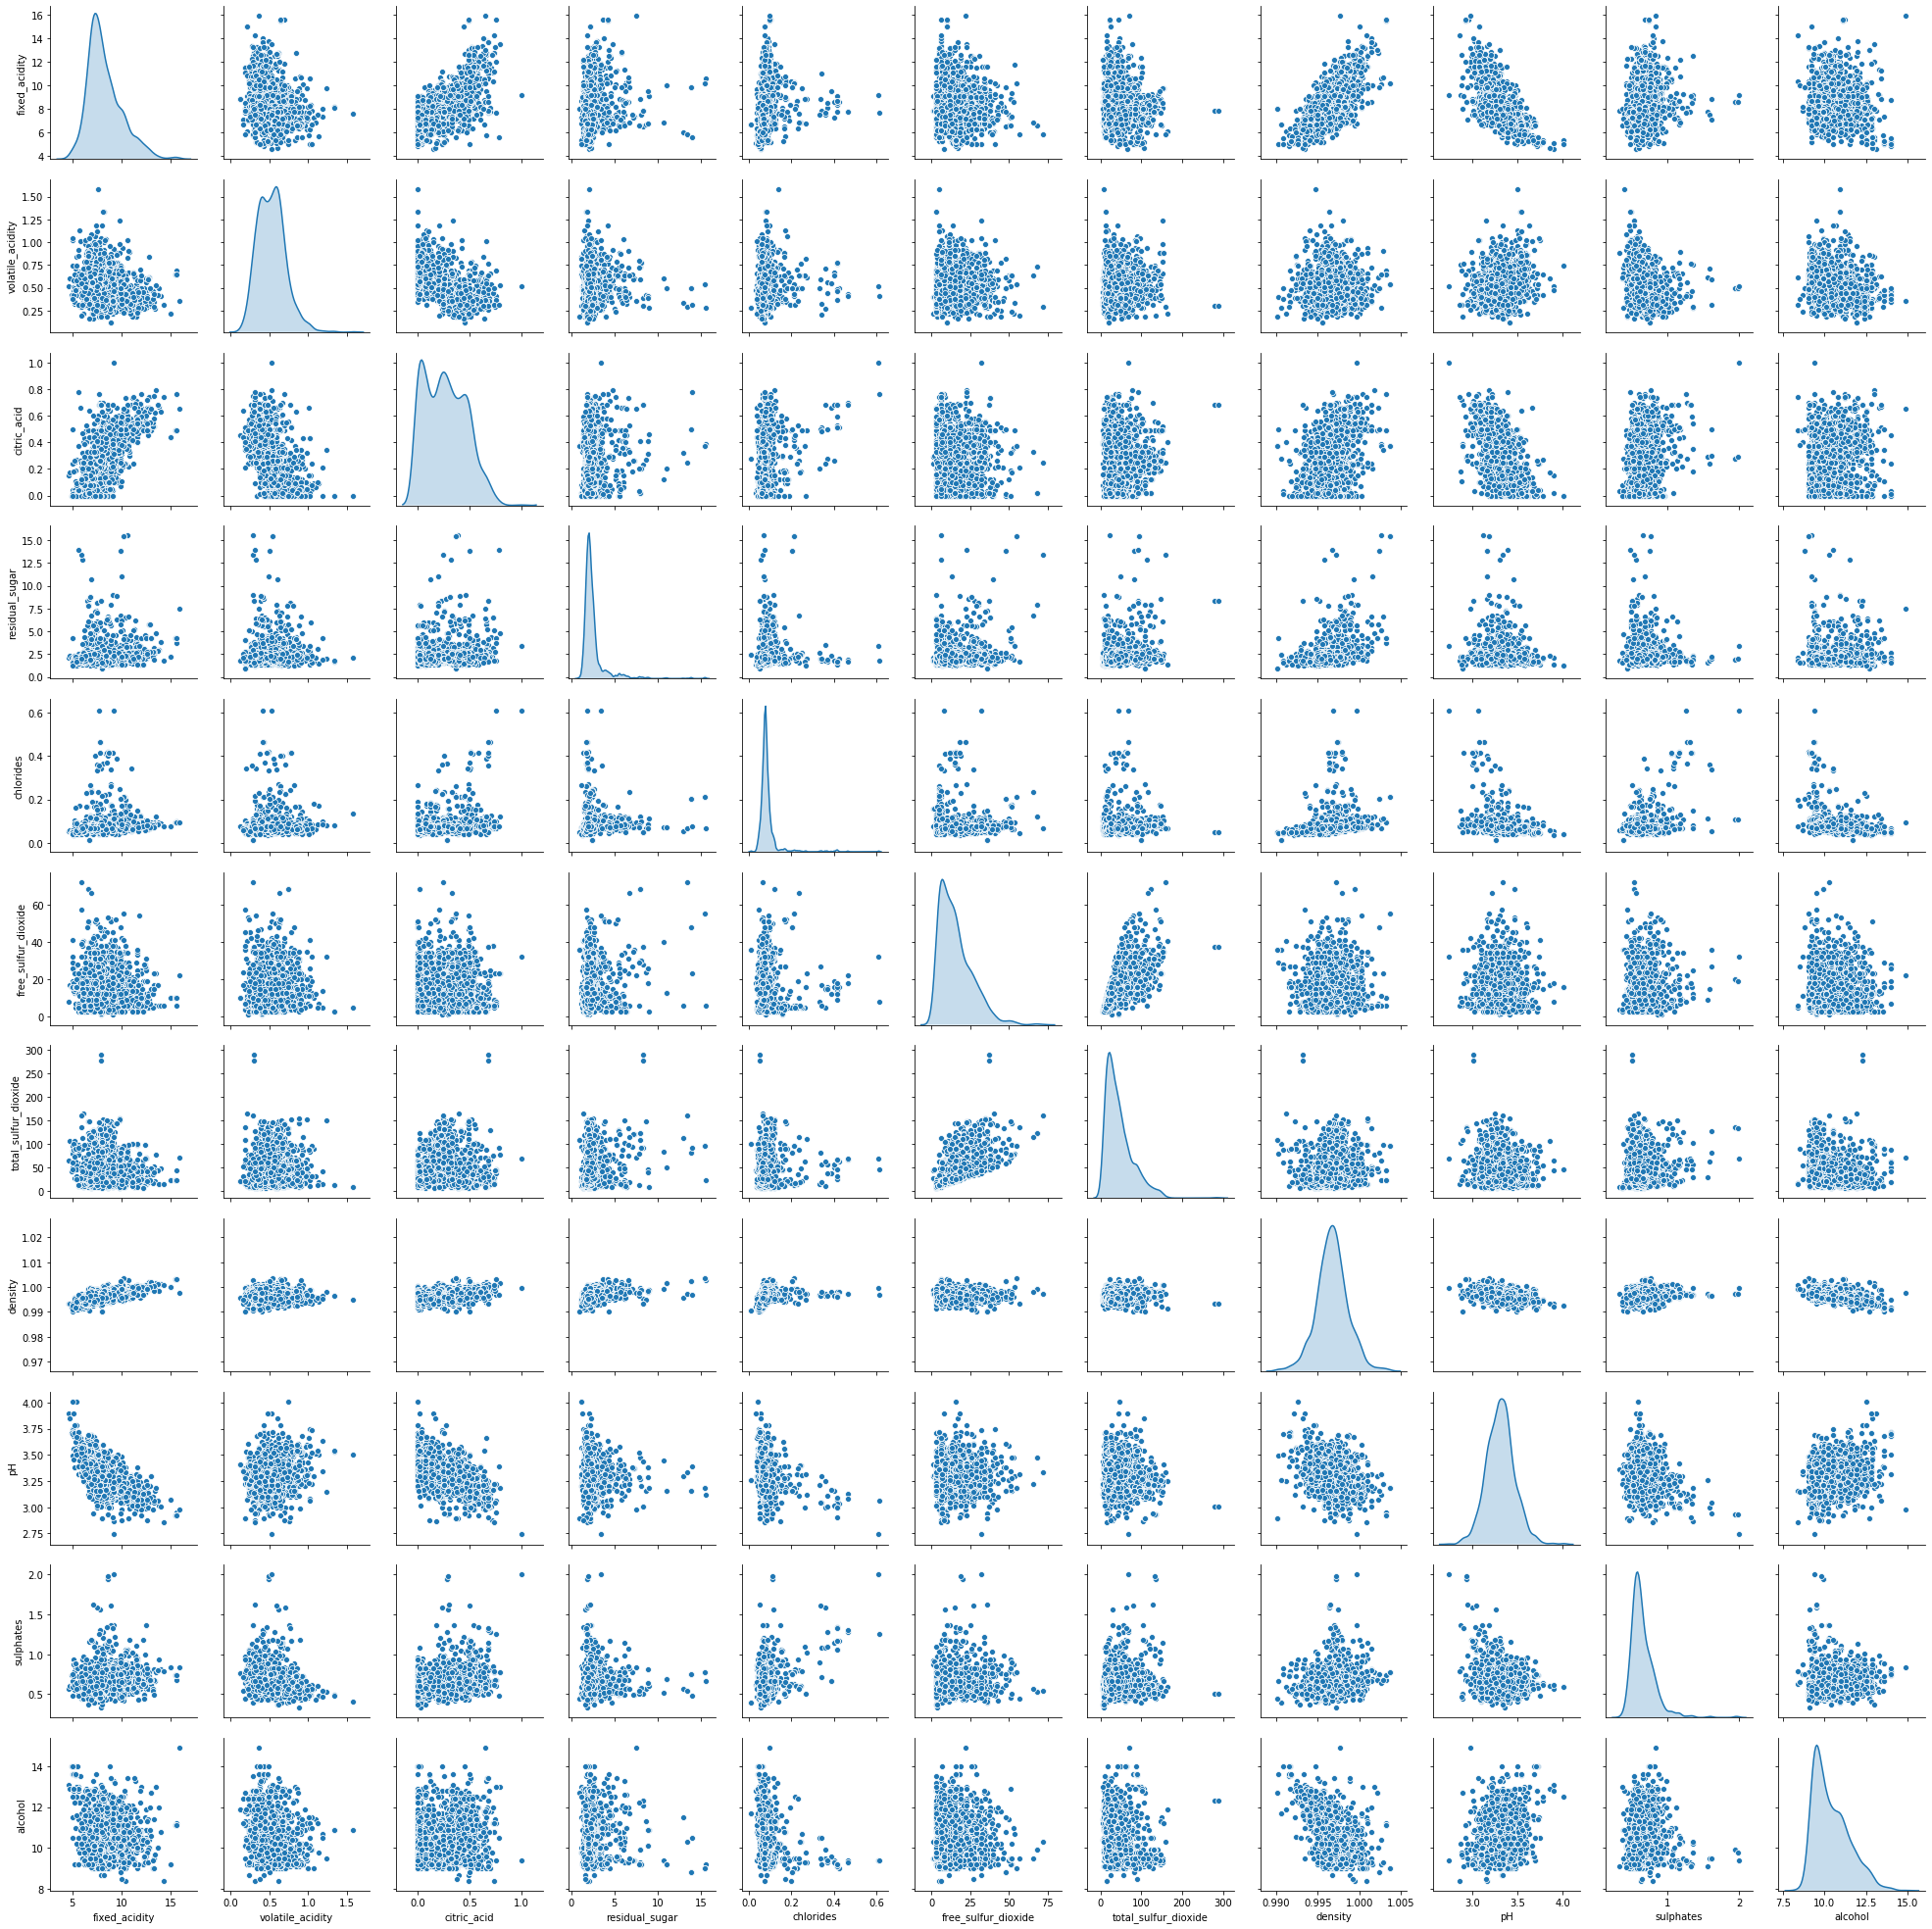

In [55]:
#sns.pairplot(df,diag_kind='kde')

In [56]:
from sklearn.preprocessing import PowerTransformer

In [57]:
pt=PowerTransformer()
df_pt=pd.DataFrame(pt.fit_transform(df))
df_pt.columns=df.columns
df_pt.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0      -0.442666          0.995542    -1.531109       -0.597145  -0.172896   
1      -0.161308          1.771299    -1.531109        0.556565   0.786204   
2      -0.161308          1.269801    -1.255359        0.152372   0.560696   
3       1.522582         -1.550050     1.398471       -0.597145  -0.226113   
4      -0.442666          0.995542    -1.531109       -0.597145  -0.172896   

   free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates  \
0            -0.268045             -0.124411  0.564442  1.275690  -0.581650   
1             0.993852              0.854954  0.036966 -0.709517   0.395140   
2             0.193450              0.540394  0.142851 -0.310054   0.183772   
3             0.385115              0.693699  0.669354 -0.980154  -0.392318   
4            -0.268045             -0.124411  0.564442  1.275690  -0.581650   

    alcohol  
0 -1.075025  
1 -0.500860  
2 -0.500860  
3 -0.500860  
4 -1.075025

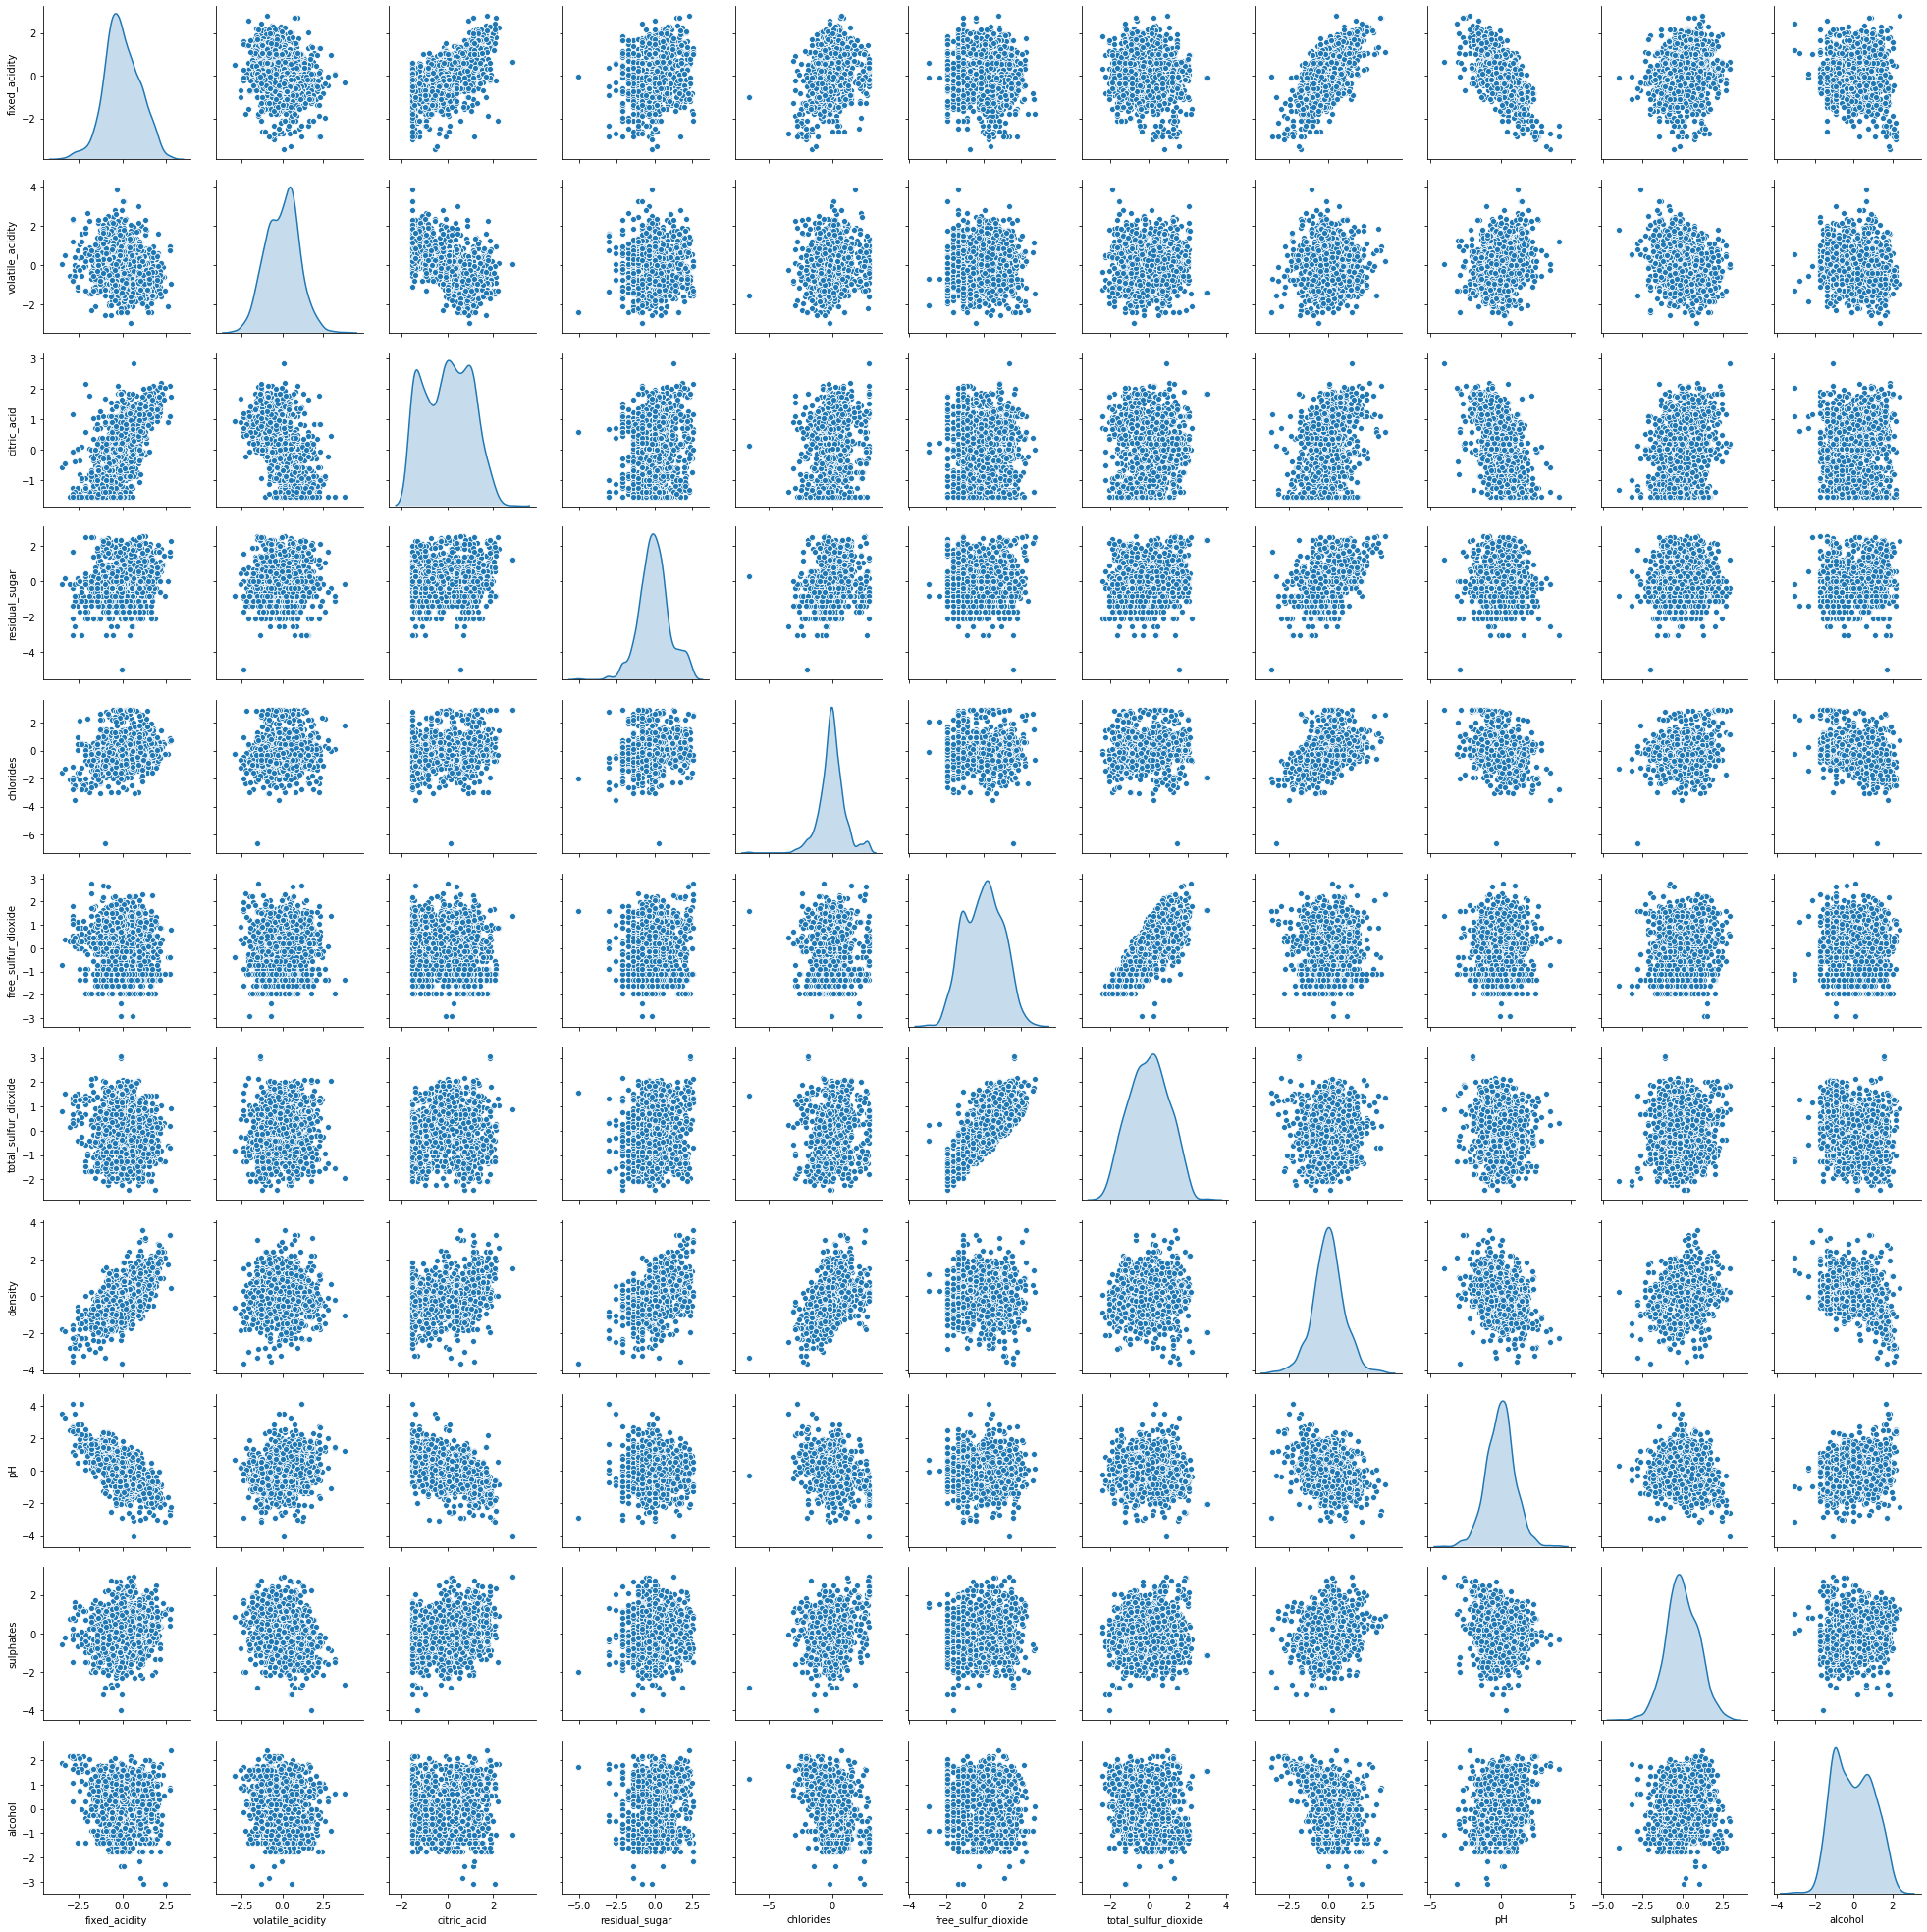

In [58]:
sns.pairplot(df_pt,diag_kind='kde')

In [81]:
from sklearn.cluster import KMeans
sse=[]
for i in range(1,10):
    km=KMeans(n_clusters=i,random_state=10)
    km.fit(df)
    sse.append(km.inertia_)

In [82]:
sse

[1914787.9880295133,
 692561.5399715928,
 395302.6246629661,
 283497.46524213674,
 221312.9145575853,
 177520.9642800467,
 150051.1364384221,
 133020.91681430722,
 116724.49161873561]

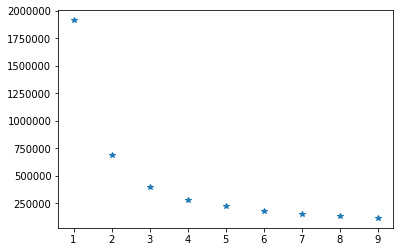

In [91]:
plt.plot(range(1,10),sse,'*')
plt.show()

In [87]:
from sklearn.metrics import silhouette_score
s_score=[]
for i in range(2,10):
    km=KMeans(n_clusters=i,random_state=10)
    km.fit(df)
    ss=silhouette_score(df,km.labels_)
    s_score.append(ss)

In [88]:
s_score

[0.6032621866982311,
 0.5217998109537265,
 0.4892933169871201,
 0.4471953738592396,
 0.4482368987540209,
 0.4022248636260136,
 0.3810665188266796,
 0.385295505769189]

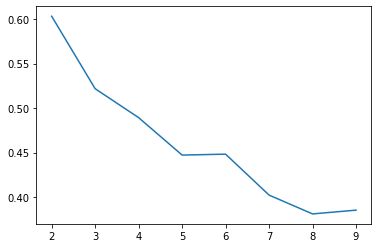

In [89]:
plt.plot(range(2,10),s_score)
plt.show()

In [66]:
km=KMeans(n_clusters=3,random_state=10)
km.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

In [67]:
df['cluster']=km.labels_

In [68]:
df.head()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  cluster  
0      9.4        1  
1      9.8        2  
2      9.8        2  
3      9.8        2  
4      9.4        1

In [69]:
df['cluster'].value_counts()

1    843
2    516
0    240
Name: cluster, dtype: int64

C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Nidhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


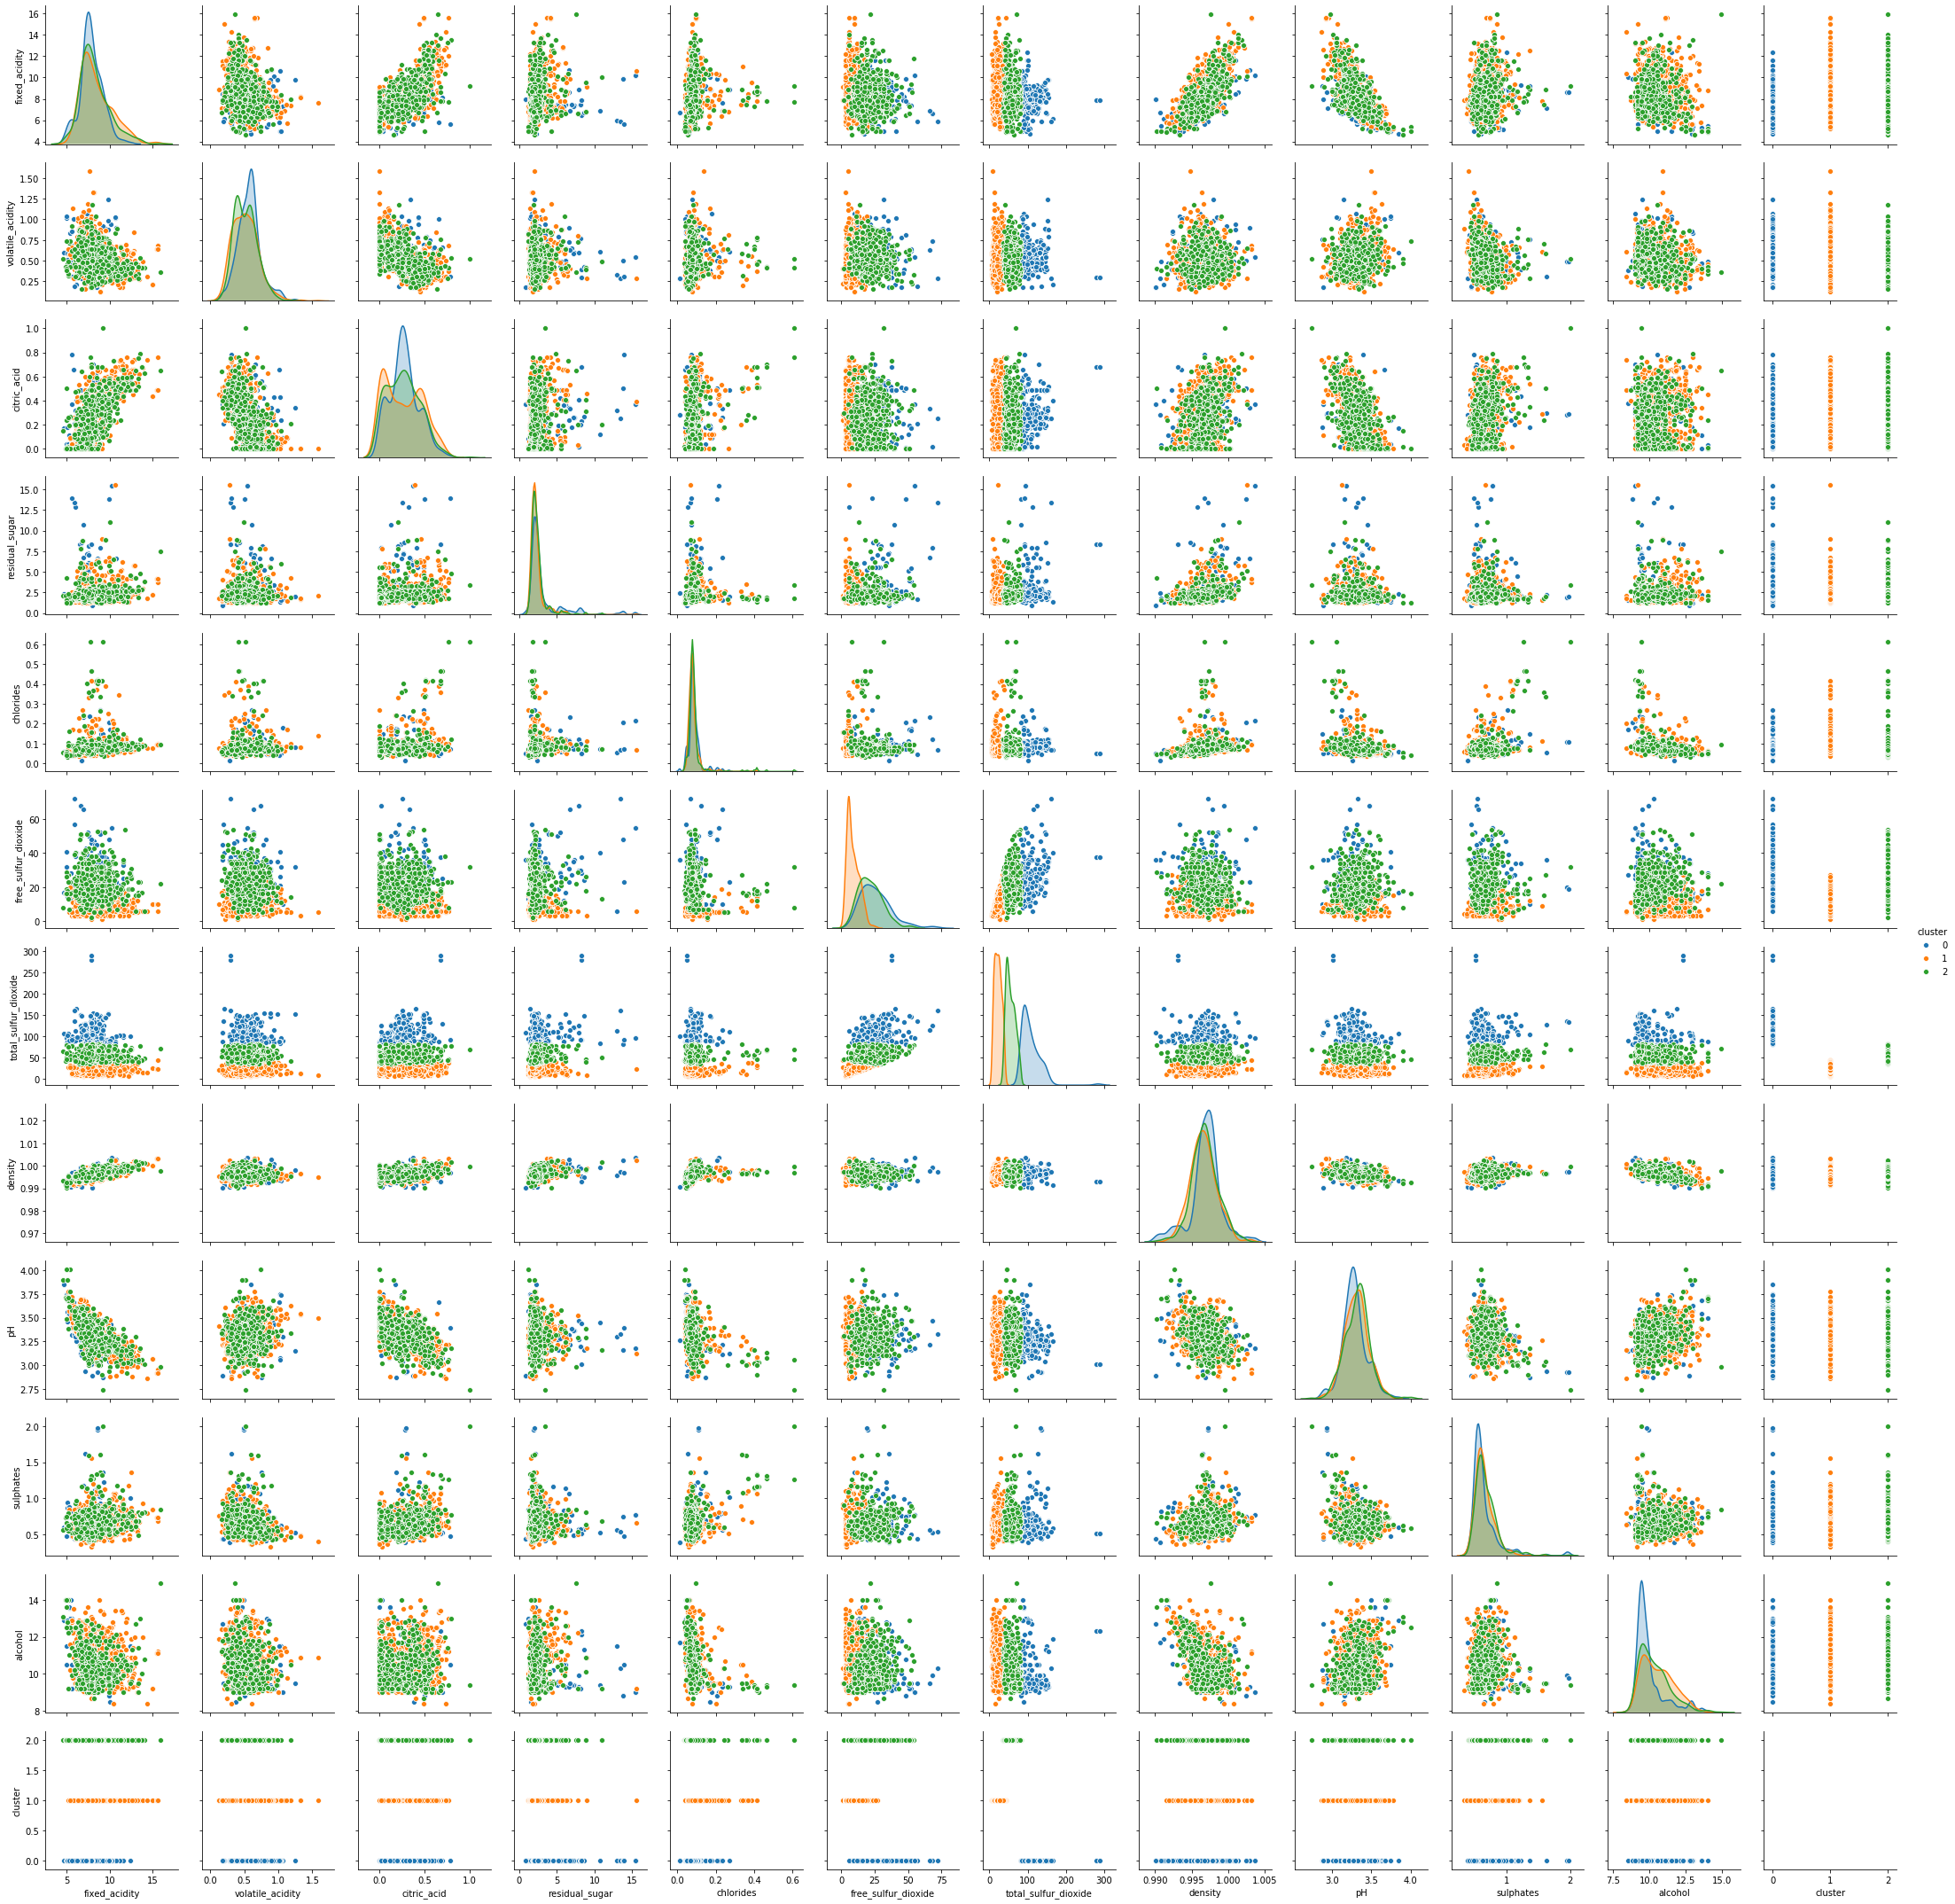

In [70]:
sns.pairplot(df,diag_kind='kde',hue='cluster')

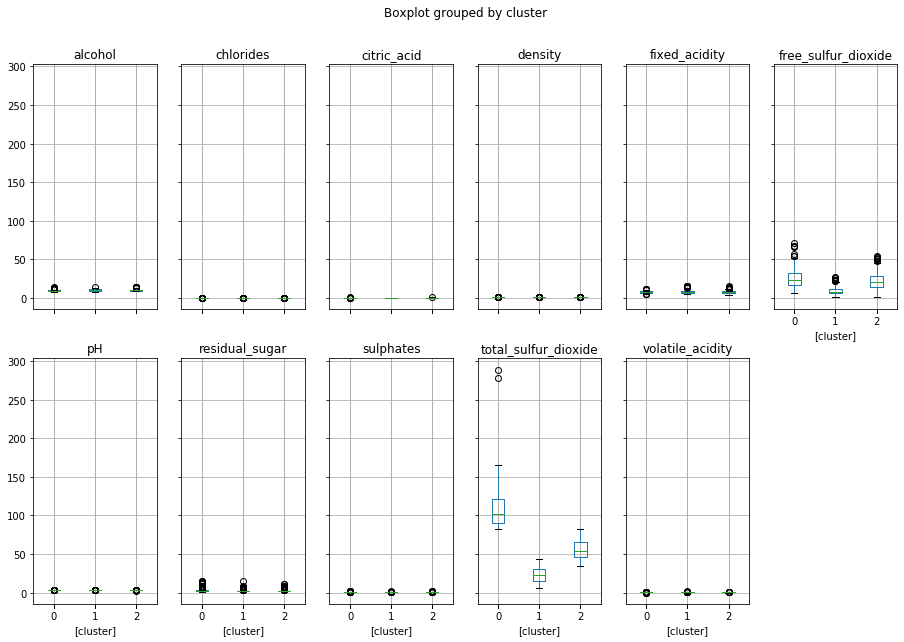

In [96]:

df.boxplot(by='cluster', layout=(2,6), figsize=(15, 10))
plt.show()